## Simulating SDEs

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as s
from scipy.integrate import quad


The **Ornstein-Uhlenbeck** process $x_t$ is defined by $$dx_t=\theta(\mu - x_t)dt+\sigma dW_t$$ where $\theta > 0, \sigma > 0$ are parameters, $dW_t$ denotes the Wiener process, and $\mu$ is constant. Can also be written as a Langevin equation of the form $$\frac{dx_t}{dt}=-\theta x_t + \sigma \eta (t)$$ where $\eta (t)$ is white noise and stands in for $\frac{dW_t}{dt},$ as $W_t$ is nowhere differentiable.

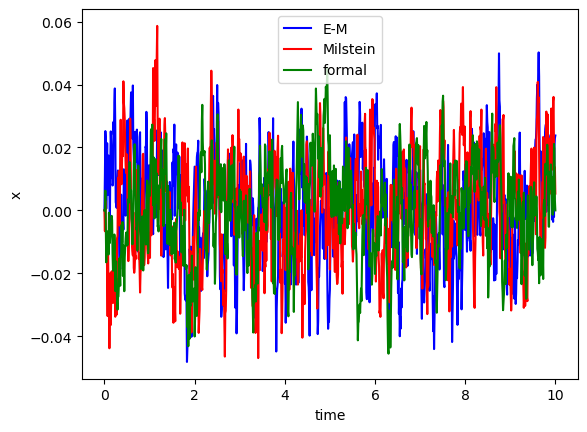

In [14]:
class Model:
    THETA = 20
    MU = 0
    SIGMA = 0.1

def mu(y: float, _t: float) -> float:
    return Model.THETA * (Model.MU - y)

def sigma(_y: float, _t: float) -> float:
    return Model.SIGMA

def dW(delta_t: float) -> float:
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

def run_simulation_EM():
    T_INIT = 0
    T_END = 10
    N = 1000
    DT = float(T_END - T_INIT) / N
    TS = np.arange(T_INIT, T_END + DT, DT)

    Y_INIT = 0
    ys = np.zeros(TS.size)
    ys[0] = Y_INIT
    for i in range(1, TS.size):
        t = (i - 1) * DT
        y = ys[i - 1]
        ys[i] = y + mu(y, t) * DT + sigma(y, t) * dW(DT)
    return TS, ys

def run_simulation_Mil():
    T_INIT = 0
    T_END = 10
    N = 1000 
    DT = float(T_END - T_INIT) / N
    TS = np.arange(T_INIT, T_END + DT, DT)
    assert TS.size == N + 1

    Y_INIT = 0

    ys = np.zeros(TS.size)
    ys[0] = Y_INIT
    for i in range(1, TS.size):
        t = T_INIT + (i - 1) * DT
        y = ys[i - 1]
        ys[i] = y + mu(y,t) * DT + sigma(y,t) * dW(DT) + sigma(y,t)**2/2 * y * (dW(DT)**2 - DT)

    return TS, ys

def run_simulation_formal():
    T_INIT = 0
    T_END = 10
    N = 1000
    DT = float(T_END - T_INIT) / N
    TS = np.arange(T_INIT, T_END + DT, DT)

    #E-M approx for integral
    ws = np.zeros(TS.size)
    for i in range(1, TS.size-1):
        t = (i - 1) * DT
        ws[i+1]=ws[i]+np.exp(Model.THETA*t)*dW(DT)

    Y_INIT = 0
    ys = np.zeros(TS.size)
    ys[0] = Y_INIT
    for i in range(1, TS.size-1):
        t = (i - 1) * DT
        ex=np.exp(-Model.THETA * t)
        ys[i] = (Y_INIT * ex +
                 Model.MU * (1 - ex) +
                 Model.SIGMA * ex * ws[i])
    return TS, ys

def run_simulation_implicit_EM():
    

def plot_simulations(num_sims: int):
    for _ in range(num_sims):
        plt.plot(*run_simulation_EM(), color='blue')
        plt.plot(*run_simulation_Mil(), color='red')
        plt.plot(*run_simulation_formal(), color='green')

    plt.xlabel("time")
    plt.ylabel("x")
    plt.gca().legend(('E-M', 'Milstein', 'formal'))
    plt.show()

if __name__ == "__main__":
    NUM_SIMS = 1
    plot_simulations(NUM_SIMS)